# Milestone 4: Leveraging Linguistic Insights to Unmask Fake Reviews

## Overview and Methodological Rational for Model Approach

In developing a model to detect fake reviews, one avenue we chose to explore was an approach that emphasizes statistical and qualitative linguistic features over deep learning-based natural language processing (NLP) transformers. This decision was based on several key considerations grounded in both practicality and literature on text analysis. In particular, M.L. Newman's 2003 paper "Lying words: Predicting deception from linguistic styles" identifies key linguistic cues that are often present in deceptive text. These cues include the use of fewer first-person pronouns, more negative emotion words, and fewer unique words.

1. Interpretability and Simplicity: One primary advantage of using simpler linguistic and statistical measures (such as word counts, parts of speech frequencies, and sentiment scores) is their interpretability. Models based on these features are often easier to understand and audit compared to models based on deep learning architectures. Literature suggests that interpretability is crucial in applications where understanding the decision-making process of the model is as important as the accuracy of the predictions. This transparency is especially important in the context of fake review detection, where stakeholders may need to understand why a review was flagged as fake.

2. Computational Efficiency: Models based on simpler statistical features are generally less computationally intensive compared to transformer-based models. This efficiency makes them more accessible for deployment in environments with limited computational resources. Futhermore, training time is considerably reduced, which is critical for rapid prototyping and model iteration.

3. Focused Feature Engineering: The use of linguistic features like POS tagging, unique word counts, and sentiment analysis allows for targeted feature engineering based on theoretical and empirical research linking these aspects to deceptive text. For instance, studies have shown that deceptive text often contains fewer unique words and relies more heavily on nouns and adjectives to create a believable but vague narrative (Newman). Similarly, sentiment extremes have been identified as potential indicators of fake reviews, aiming to overly praise or unduly criticize a product or service.

## Preprocessing and Feature Engineering

The preprocessing steps where taken care of in a previous milestone, where we cleaned the text data, removed stopwords, and tokenized the text. In this milestone, we focus on feature engineering to extract relevant statistical and  qualitative aspects of the text that are indicative of authenticity or deception. By focusing on elements such as sentiment analysis, unique word counts, and POS tagging, we align our methodology with literature findings that suggests these metrics can effectively distinguish genuine content from fake reviews.

**Feature Justification:**
- **Sentiment Analysis:** Sentiment analysis is a common feature used in fake review detection models. Fake reviews often exhibit extreme sentiment, either overly positive or negative, as a way to manipulate readers' perceptions. By calculating sentiment scores for each review, we can identify reviews with sentiment that deviates significantly from the norm.
- **Unique Word Count:** Fake reviews often contain fewer unique words compared to genuine reviews. This is because deceptive text tends to be more repetitive and less detailed. By counting the number of unique words in each review, we can capture this characteristic.
- **Parts of Speech (POS) Tagging:** POS tagging can provide insights into the syntactic structure of the text. Deceptive reviews may exhibit different POS patterns compared to genuine reviews. For example, fake reviews might contain more adjectives or nouns to create a positive or negative impression without providing substantive information. By analyzing the distribution of POS tags in the text, we can identify patterns that are indicative of deception.

## Modeling Strategy

The choice to utilize machine learning models like AdaBoost, Random Forest, and Logistic Regression was motivated by their interpretability, ease of implementation, and ability to handle a mix of numerical and categorical features. These models are well-suited for the linguistic features we have engineered, as they can capture complex relationships between the features and the target variable (fake vs. genuine reviews).

**Modeling with Selected Features:**
- **AdaBoost:** AdaBoost is an ensemble method that combines multiple weak learners to create a strong classifier. It is particularly effective when dealing with text data and can handle both numerical and categorical features. By using AdaBoost, we aim to leverage the power of boosting to improve the model's performance.
- **Random Forest:** Random Forest is an ensemble method that builds multiple decision trees and combines their predictions. It is robust to overfitting and can handle a mix of feature types. Random Forest is well-suited for our linguistic features as it can capture non-linear relationships between the features and the target variable.
- **Logistic Regression:** Logistic Regression is a linear model that is widely used for binary classification tasks. It is interpretable and can provide insights into the importance of each feature. By using Logistic Regression, we aim to understand the contribution of each linguistic feature to the model's predictions.

## Modeling Pipeline

The modeling pipeline involves several steps to prepare the data, engineer features, train the models, and evaluate their performance. The purpose is for easy reproducibility and scalability of the model development process. The process incorporates creating, fitting, and evaluating multiple machine learning models, using a structured pipeline approach to ensure systematic optimization and validation of model parameters. 

1. Pipeline Creation and Configuration: The `create_pipeline` function is essential for standardizing the modeling process. It takes an estimator (SKlearn machine learning model), a parameter grid for hyperparameter tuning, and a cross-validation strategy as inputs. TThe pipeline comprises of two main stages:
- Preprocessing with MinMaxScaler: This stage normalizes all the feature values to a range between 0 and 1. Normalization is crucial as it ensures that all feature contribute equally to the model's learning, preventing single feature with a larger scale from dominating the learning process.
- Hyperparameter Tuning with GridSearchCV: This component optimizes the model parameters using grid search, which systematically tests a range of user-specified parametr values to fund the combination that maximizes the model's performance, assessed via the ROC-AUC score. This ensures the robustness of the model by selecting the best parameters from a defined set.
2. Pipeline Fitting: The `fit_pipeline` function is designed to fit the pipeline to the training data. It executed the preprocessing and parameter tuning defined in the pipeline configuration. The process includes printing the status of the fitting, which is critical for debugging and tracking the progress of the model training, especially in scenarios involving extensive computational work.
3. Model Evaluation: Once the models are fitted, the `evaluate_models` function assesses their performance using cross-validation. This method provides a more robust estimate of model effectiveness by evaluating the model across multiple subsamples of the data. The evaluation metrics used are:
- Accuracy: Measures the overall correctness of the model.
- Precision: Assesses the model's accuracy in predicting positive labels.
- Recall: Evaluates how well the model can identify all positive instances/
- F1 Score: Provides a balance between precision and recall.

After training, the models are evaluated using the previously mentgioned metrics, and a summary of the results is provided for comparison. The Random Forest model is selected as the best-performing model based on the ROC-AUC score, which is a robust metric for evaluating binary classification models.

In [2]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
import random
import seaborn as sns
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    StratifiedKFold,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from textblob import TextBlob
# spaCY
import spacy
from spacy.training import Example 
from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL 

nltk.download("averaged_perceptron_tagger")
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from collections import Counter
import spacy


from bs4 import BeautifulSoup
from pandarallel import pandarallel
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score

import flair
from textattack.augmentation import WordNetAugmenter

import spacy
import random
from spacy.training import Example 

from spacy.pipeline.textcat_multilabel import DEFAULT_MULTI_TEXTCAT_MODEL 
from spacy.pipeline.textcat import DEFAULT_SINGLE_TEXTCAT_MODEL

import copy
import time
from func_timeout import func_timeout, FunctionTimedOut
import re

from utils import *




[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2024-04-24 19:59:57.601464: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 19:59:57.601575: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 19:59:57.601810: E tensorflow/com

In [8]:
def load_data(filepath="./data/processed/processed.csv"):
    return pd.read_csv(filepath)

In [3]:
def generate_sentiment_scores(df):
    sentiments = df["text_"].apply(lambda review: TextBlob(str(review)).sentiment)
    df["sentiment_score"], df["sentiment_subjectivity"] = zip(*sentiments)
    return df

In [4]:
def visualize_sentiment_scores(df):
    sns.histplot(df["sentiment_score"], kde=True)
    plt.title("Sentiment Score Distribution")
    plt.show()

    sentiment_categories = df["sentiment_score"].apply(
        lambda score: "Positive" if score >= 0 else "Negative"
    )
    sns.countplot(x=sentiment_categories)
    plt.title("Sentiment Score Distribution")
    plt.show()

In [5]:
def count_negative_words(df):
    df["neg_count"] = df["text_"].apply(
        lambda review: sum(
            TextBlob(word).sentiment.polarity < 0 for word in str(review).split()
        )
    )
    return df

In [6]:
def count_unique_words(df):
    df["word_count"] = df["text_"].apply(lambda x: len(str(x).split()))
    df = df[df["word_count"] != 0].reset_index(drop=True)
    df["unique_word_count"] = df["text_"].apply(lambda x: len(set(str(x).split())))
    return df

In [7]:
# pos tagging
articles = ["a", "an", "the"]
negations = [
    "not",
    "no",
    "never",
    "none",
    "nobody",
    "nothing",
    "neither",
    "nowhere",
    "nor",
]
auxiliaries = [
    "be",
    "have",
    "do",
    "will",
    "would",
    "shall",
    "should",
    "can",
    "could",
    "may",
    "might",
    "must",
]


def count_pos(review):
    filter = re.sub("[^\w\s]", "", str(review))
    review_lower = filter.lower()
    review_split = review_lower.split()

    unique_words = Counter(review_split)
    sentence = " ".join(unique_words.keys())

    word_list = nltk.word_tokenize(sentence)

    Art = sum(word in articles for word in word_list)
    Nega = sum(word in negations for word in word_list)
    Aux = sum(word in auxiliaries for word in word_list)

    tagged = nltk.pos_tag(word_list)
    counts = Counter(tag for word, tag in tagged)

    nount_count = sum(counts[i] for i in counts.keys() if "NN" in i)
    verb_count = sum(counts[i] for i in counts.keys() if "VB" in i)
    adj_count = sum(counts[i] for i in counts.keys() if "JJ" in i)
    adv_count = sum(counts[i] for i in counts.keys() if "RB" in i)
    pro_count = sum(
        counts[i]
        for i in counts.keys()
        if (("PRP" in i) or ("PRP$" in i) or ("WP" in i) or ("WP$" in i))
    )
    pre_count = sum(counts[i] for i in counts.keys() if "IN" in i)
    con_count = sum(counts[i] for i in counts.keys() if "CC" in i)

    return [
        nount_count,
        verb_count,
        adj_count,
        adv_count,
        pro_count,
        pre_count,
        con_count,
        Art,
        Nega,
        Aux,
    ]

In [8]:
def calculate_authenticity(df):
    df["authenticity"] = (
        df["pro_count"] + df["unique_word_count"] - df["neg_count"]
    ) / df["word_count"]
    return df

In [9]:
def calculate_analytical_thinking(df):
    df["analytical_thinking"] = (
        30
        + df[["art_count", "pre_count"]].sum(axis=1)
        - df[["pro_count", "con_count", "adv_count", "neg_count"]].sum(axis=1)
    )
    return df

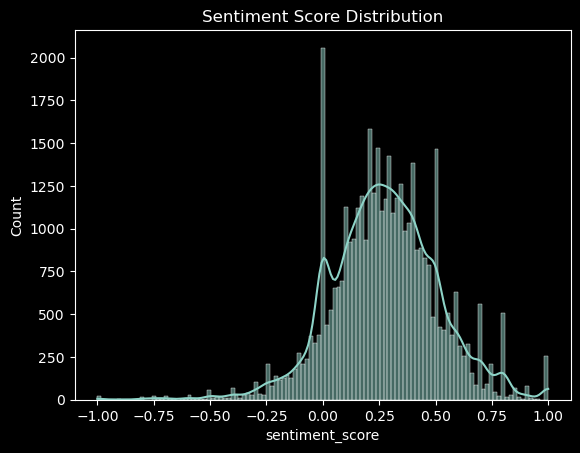

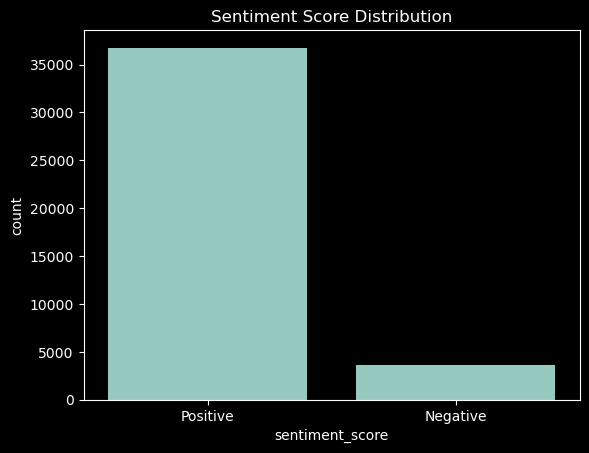

In [11]:
df = load_data()
df = generate_sentiment_scores(df)
visualize_sentiment_scores(df)
df = count_negative_words(df)
df = count_unique_words(df)
pos = [
    "noun_count",
    "verb_count",
    "adj_count",
    "adv_count",
    "pro_count",
    "pre_count",
    "con_count",
    "art_count",
    "neg_count",
    "aux_count",
]
df[pos] = (
    pd.DataFrame(df["text_"].apply(count_pos).tolist(), columns=pos)
    .fillna(0)
    .astype(int)
)
df = calculate_authenticity(df)
df = calculate_analytical_thinking(df)

In [13]:
def create_pipeline(estimator, param_grid, cv):
    pipeline = Pipeline(
        [
            ("preprocessing", MinMaxScaler()),
            (
                "classifier",
                GridSearchCV(
                    estimator=estimator,
                    param_grid=param_grid,
                    scoring="roc_auc",
                    cv=cv,
                    n_jobs=-1,
                ),
            ),
        ]
    )
    return pipeline

In [14]:
def fit_pipeline(pipeline, X_train, y_train):
    print("Fitting grid search...")
    pipeline.fit(X_train, y_train)
    print("Grid search fitted.")
    return pipeline

In [15]:
def evaluate_models(models, X, y, folds):
    scoring = {
        "accuracy": make_scorer(accuracy_score),
        "precision": make_scorer(precision_score),
        "recall": make_scorer(recall_score),
        "f1_score": make_scorer(f1_score),
    }
    scores = {
        model_name: cross_validate(model, X, y, cv=folds, scoring=scoring)
        for model_name, model in models.items()
    }
    models_scores_table = pd.DataFrame(
        {
            model_name: [
                model_scores["test_accuracy"].mean(),
                model_scores["test_precision"].mean(),
                model_scores["test_recall"].mean(),
                model_scores["test_f1_score"].mean(),
            ]
            for model_name, model_scores in scores.items()
        },
        index=["Accuracy", "Precision", "Recall", "F1 Score"],
    )
    models_scores_table["Best Score"] = models_scores_table.idxmax(axis=1)
    return models_scores_table

In [16]:
df_model = df[
    [
        "rating",
        "sentiment_score",
        "sentiment_subjectivity",
        "word_count",
        "noun_count",
        "adj_count",
        "verb_count",
        "adv_count",
        "authenticity",
        "analytical_thinking",
        "score",
    ]
]

X = df_model
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
# Adaboost
DTC = DecisionTreeClassifier(random_state=11, class_weight="balanced", max_depth=None)
ABC = AdaBoostClassifier(estimator=DTC)
parameters = {
    "n_estimators": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    "learning_rate": [(0.97 + x / 100) for x in range(0, 8)],
    "algorithm": ["SAMME"],
}
pipeline1 = create_pipeline(ABC, parameters, 5)
pipeline1 = fit_pipeline(pipeline1, X_train, y_train)

# RandomForest
parameters = {
    "bootstrap": [True],
    "max_depth": [80, 90, 100, 110],
    "max_features": [2, 3, 4, 5, 6],
    "min_samples_leaf": [2, 3, 4],
    "min_samples_split": [2, 5, 10],
    "n_estimators": [100, 200, 300, 1000],
}
pipeline2 = create_pipeline(
    RandomForestClassifier(random_state=42), parameters, StratifiedKFold(n_splits=2)
)
pipeline2 = fit_pipeline(pipeline2, X_train, y_train)

# Logistic Regression
parameters = {
    "C": [10**i for i in range(-5, 5)],
    "class_weight": [None, "balanced"],
}
pipeline3 = create_pipeline(
    LogisticRegression(max_iter=1000), parameters, StratifiedKFold(n_splits=5)
)
pipeline3 = fit_pipeline(pipeline3, X_train, y_train)

models = {
    "AdaBoost": pipeline1,
    "Random Forest": pipeline2,
    "Logistic Regression": pipeline3,
}

models_scores_table = evaluate_models(models, X, y, 3)

In [18]:
models_scores_table

,AdaBoost,Random Forest,Logistic Regression,Best Score
Accuracy,0.676173,0.729522,0.699546,Random Forest
Precision,0.674298,0.723076,0.697613,Random Forest
Recall,0.682827,0.745005,0.704740,Random Forest
F1 Score,0.678407,0.733713,0.701151,Random Forest


## spaCy Model

In [3]:
processed_df = load_data("../../data/processed/processed.csv")
product_categories = processed_df.columns[3:]

In [4]:
X = processed_df.iloc[:,2:].values
y = processed_df.label.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
def generate_spacy_train_examples(X, y, prod_cat_index=-1):
    train_examples = []
    
    if prod_cat_index == -1:
        text_label_pairs = np.transpose(np.vstack((X[:, 0],y)))
    else:
        row_indices = np.where(X[:,prod_cat_index+1]==1)
        text_label_pairs = np.transpose(np.vstack((X[row_indices, 0],y[row_indices])))
    
    for text_label in text_label_pairs:
        label = {"spam": bool(text_label[1]), "ham": (not bool(text_label[1]))} 
        train_examples.append(Example.from_dict(nlp.make_doc(str(text_label[0])), {"cats": label}))
    print(f"Generating {len(train_examples)} train examples for the spaCy model...")
    return train_examples   


In [26]:
nlp = spacy.load("en_core_web_sm") 

config = { 
   "threshold": 0.5, 
   "model": DEFAULT_MULTI_TEXTCAT_MODEL 
} 

textcat = nlp.add_pipe("textcat", config=config)
textcat.add_label("spam")
textcat.add_label("ham")

train_examples = generate_spacy_train_examples(X_train, y_train)
textcat.initialize(lambda: train_examples, nlp=nlp)

Generating 32345 train examples for the spaCy model...


In [13]:
epochs = 2
with nlp.select_pipes(enable="textcat"): 
  optimizer = nlp.resume_training() 
  for i in range(epochs): 
    random.shuffle(train_examples) 
    for example in train_examples: 
      nlp.update([example], sgd=optimizer) 

In [14]:
def find_model_accuracy(X, y, spacy_nlp, prod_cat_index=-1):
    if prod_cat_index == -1:
        X_test = X[:,0]
        y_test = y
    else:
        row_indices = np.where(X[:,prod_cat_index+1]==1)
        X_test = X[row_indices,0][0]
        y_test = y[row_indices]
    y_pred = []
    for test_sample in X_test:
        testdoc = spacy_nlp(str(test_sample))
        y_pred.append(testdoc.cats['spam']>0.5)
    y_pred = np.array(y_pred).astype(int)
    acc = accuracy_score(y_test, y_pred)
    return acc


In [18]:
overal_accuracy = find_model_accuracy(X_test, y_test, nlp)
accuracy_list = []
for idx, category in enumerate(product_categories):
    accuracy_list.append(find_model_accuracy(X_test, y_test, nlp, idx))

In [19]:
print("The test accuracy scores for each product category are:")
for cat, acc in zip(product_categories, accuracy_list):
    print(f"{cat.replace('_',' ').replace('5','').ljust(30)}:\t{acc:.2f}")

print(f"\nThe overal accuracy of the base model is {overal_accuracy:.2f}.")


The test accuracy scores for each product category are:
Books                         :	0.88
Clothing Shoes and Jewelry    :	0.89
Electronics                   :	0.88
Home and Kitchen              :	0.91
Kindle Store                  :	0.91
Movies and TV                 :	0.90
Pet Supplies                  :	0.90
Sports and Outdoors           :	0.91
Tools and Home Improvement    :	0.92
Toys and Games                :	0.91

The overal accuracy of the base model is 0.90.


### Further Experiments

Given the varition of the test accuracy accross different product categories, we decided to consider training separate models, each specialized for a particular product category. The potential benefit would be having more specialized models that are trained specifically for the vocabulary set that is more prevalent
 for each product category.  On the other hand, we will be training each model with a vastly smaller (i.e around 10%) number of training samples  In an effort to accomodate for the smaller training set, we trained each model for a larger number of epochs.

In [27]:
train_examples_per_category = []
for idx, category in enumerate(product_categories):
    train_examples = generate_spacy_train_examples(X_train, y_train, idx)
    train_examples_per_category.append(train_examples)

Generating 3474 train examples for the spaCy model...
Generating 3097 train examples for the spaCy model...
Generating 3159 train examples for the spaCy model...
Generating 3226 train examples for the spaCy model...
Generating 3769 train examples for the spaCy model...
Generating 2878 train examples for the spaCy model...
Generating 3416 train examples for the spaCy model...
Generating 3181 train examples for the spaCy model...
Generating 3101 train examples for the spaCy model...
Generating 3044 train examples for the spaCy model...


**NOTE:** In order to save time, we will train the product-category-specific models for a subset of all the categories.  If we find that these models perform better than the generic model, we will train additional models for the remaining product types.

In [28]:
epochs = 4
NUMBER_OF_CATEGORIES_TO_TRAIN = 4
accuracy_list_per_category = []
for idx, train_examples in enumerate(train_examples_per_category[0:NUMBER_OF_CATEGORIES_TO_TRAIN]):
    textcat.initialize(lambda: train_examples, nlp=nlp)
    with nlp.select_pipes(enable="textcat"):
        optimizer = nlp.resume_training() 
        for i in range(epochs):
            random.shuffle(train_examples)
            for example in train_examples: 
                nlp.update([example], sgd=optimizer)
    
    # Record test accuracy for each category
    accuracy_list_per_category.append(find_model_accuracy(X_test, y_test, nlp, idx))

print("The test accuracy scores when training a separate model for each product category are:\n")
for cat, acc in zip(product_categories[:NUMBER_OF_CATEGORIES_TO_TRAIN], accuracy_list_per_category):
    print(f"{cat.replace('_',' ').replace('5','').ljust(30)}:\t{acc:.2f}")

The test accuracy scores when training a separate model for each product category are:

Books                         :	0.88
Clothing Shoes and Jewelry    :	0.82
Electronics                   :	0.83
Home and Kitchen              :	0.87


Given that the accuracies of the specific models are worse or similar to the accuracy of the overall model, we will not pursue this approach any further.

### An Adversarial Approach

The original model performs well, but the difference in vocabulary sizes between real and computer-generated reviews gives us cause for concern. How much of the model's performance can be attributed to the limited vocabulary of the machine-generated reviews? Could the model be defeated by simply swapping out some words with thesaurus?

To find out, we used the <a href="https://arxiv.org/abs/2005.05909">TextAttack</a> module to augment the data by randomly replacing words with their synonyms using Wordnet.

**Read the data**

In [3]:
try:
    raw_df = pd.read_csv("data/raw/fake reviews dataset.csv")
    processed_df = pd.read_csv("data/processed/processed.csv")
except:
    raw_df = pd.read_csv("../../data/raw/fake reviews dataset.csv")
    processed_df = pd.read_csv("../../data/processed/processed.csv")   

**Train and test the baseline model**

In [4]:
X = processed_df.text_.values
y = processed_df.label.values
X_train, X_test, y_train, y_test, ix_train, ix_test = train_test_split(X, y, np.arange(0, X.shape[0]), test_size=0.2)
nlp = build_classifier(X_train, y_train)

# Now run the classifier on the test data
y_hat = classify(nlp, X_test)

# Report the classification accuracy on the test data
acc = accuracy_score(y_test, y_hat)
print(f"The accuracy of the base model is {acc:.2f}.")



The accuracy of the base model is 0.90.


In [6]:
raw_text = raw_df["text_"].tolist()

# This augments a corpus but implements caching so that we don't have to augment it repeatedly.
def get_augmented(pct=0.2):
    p = str(int(pct * 100))
    p = re.sub("0*$", "", p)
    fn = "../../data/df_p" + p + ".csv"
    try:
        df = pd.read_csv(fn, index_col=0)
    except:
        a = wordnet_augment(raw_text, pct)
        df = pd.DataFrame([a]).transpose()
        df.to_csv(fn)
        df.columns = ["0"]
    return(df["0"]).tolist()


def get_aug_error(p, model, name="base"):
    aug_test = copy.copy(X_test)
    if(p > 0):
        aug = pd.Series(get_augmented(p))
        aug_in = aug[ix_test]
        aug_test[y_test == 1] = list(map(clean_text, aug_in[y_test == 1].tolist()))
    y_hat = []
    for test_sample in aug_test:
        testdoc = model(str(test_sample))
        y_hat.append(testdoc.cats['spam'] > 0.5)
    y_hat = np.array(y_hat).astype(int)
    acc = accuracy_score(y_test, y_hat)
    print(f"The accuracy of the {name} model against a thesaurus attack substituting {p} words is {acc:.2f}.")
    return(acc)


pcts = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
accuracies = list(map(lambda a: get_aug_error(a, nlp, "base"), pcts))

Text(0, 0.5, '% accuracy')

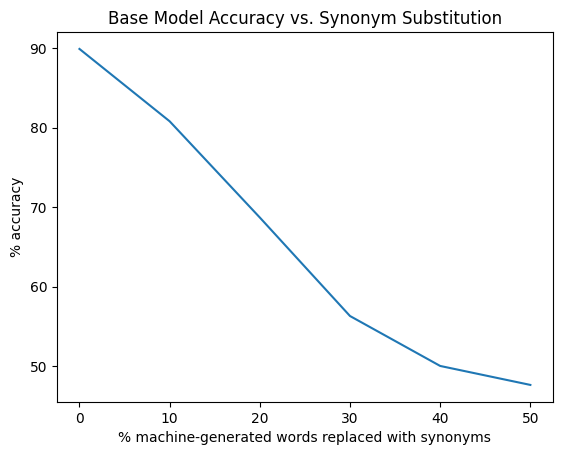

In [14]:
plt.plot(np.array(pcts) * 100, np.array(accuracies) * 100)
plt.title("Base Model Accuracy vs. Synonym Substitution")
plt.xlabel('% machine-generated words replaced with synonyms')
plt.ylabel('% accuracy')

**A crushing defeat!**

As it turns out, robotic spammers could evade our model by randomly swapping words for their synonyms. We need to harden the model against those sorts of attacks.

In [7]:
# The aim is to generate an augmented dataset that is representative of the sorts of tricks that spammers might try.
# We will use the original dataset concatenated with a copy that has 40% of the words swapped with synonyms.
# Note that we will be training the model with augmented data indicating that human-generated reviews with swapped-out words are not computer-generated!

X_aug = pd.Series(list(map(clean_text, get_augmented(0.4))))

nlp_aug = spacy.load("en_core_web_sm") 

config = { 
   "threshold": 0.5, 
   "model": DEFAULT_MULTI_TEXTCAT_MODEL 
} 

textcat_aug = nlp_aug.add_pipe("textcat", config=config) 
aug_train_examples = []
for idx, text in enumerate(X_aug[ix_train]):
    label = {"spam": bool(y_train[idx]), "ham": (not bool(y_train[idx]))} 
    aug_train_examples.append(Example.from_dict(nlp.make_doc(str(text)), {"cats": label}))

for idx, text in enumerate(X_train):
    label = {"spam": bool(y_train[idx]), "ham": (not bool(y_train[idx]))} 
    aug_train_examples.append(Example.from_dict(nlp.make_doc(str(text)), {"cats": label}))

textcat_aug.add_label("spam")
textcat_aug.add_label("ham")
textcat_aug.initialize(lambda: aug_train_examples, nlp=nlp_aug)

In [8]:
# Train a model with the augmented training data

epochs = 4
with nlp_aug.select_pipes(enable="textcat"): 
  optimizer = nlp_aug.resume_training() 
  for i in range(epochs):
    print(f"epoch {i} of {epochs}")
    random.shuffle(aug_train_examples) 
    for example in aug_train_examples: 
      nlp_aug.update([example], sgd=optimizer) 

pcts = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
aug_accuracies = list(map(lambda a: get_aug_error(a, nlp_aug, "wordnet_augmented_40pct"), pcts))

Text(0, 0.5, '% accuracy')

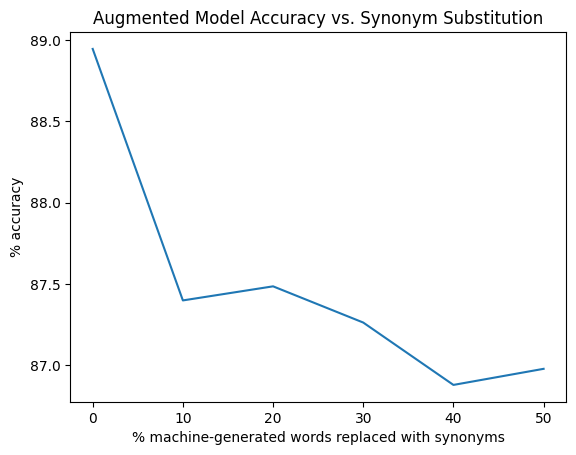

In [12]:
plt.plot(np.array(pcts) * 100, np.array(aug_accuracies) * 100)
plt.title("Augmented Model Accuracy vs. Synonym Substitution")
plt.xlabel('% machine-generated words replaced with synonyms')
plt.ylabel('% accuracy')

**Success**

The model trained with augmented data managed to correctly classify a range of synonym-swapped, computer-generated reviews that it had never seen before. There was a performance hit when classifying reviews that had not been synonym-swapped, and the performance hit is statistically significant at a p=0.05 level using a chi-square test (I calculated $\alpha=0.0391$ on one run), but it is small.

In [9]:
# Running this cell reloads utils.py
# It is useful for debugging but otherwise has no effect

import utils
import importlib
importlib.reload(utils)
from utils import *

### Attribution

Connor: Feature generation \
Amir: Performance evaluation \
Geoffrey: Data augmentation \
Chris: Final edits